## 필요한 라이브러리 임포트

In [1]:
# 표준 라이브러리 임포트

# 서드 파티 라이브러리 임포트
import pandas as pd

# 로컬 모듈 임포트
from config import DATA_DIR
from utils import load_dataset

## Detroit의  최근 5시즌 승률 그래프 그리기

### Detroit 시즌 별 최종 승률 데이터 준비

In [2]:
# 데이터셋 불러오기
ranking = load_dataset('ranking')
ranking.head(10)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN
5,1610612758,0,22022,2022-12-22,West,Sacramento,30,17,13,0.567,9-5,8-8,NaN
6,1610612762,0,22022,2022-12-22,West,Utah,35,19,16,0.543,12-5,7-11,NaN
7,1610612757,0,22022,2022-12-22,West,Portland,32,17,15,0.531,7-6,10-9,NaN
8,1610612742,0,22022,2022-12-22,West,Dallas,32,16,16,0.500,12-5,4-11,NaN
9,1610612750,0,22022,2022-12-22,West,Minnesota,32,16,16,0.500,9-8,7-8,NaN


In [48]:
# Detroit의 ranking만 가져오기
team_cond = ranking['TEAM'] == 'Detroit'
detroit_ranking =ranking[team_cond]

# 각 시즌 별 최종 랭킹
last_date = detroit_ranking.groupby('SEASON_ID').agg({'STANDINGSDATE': 'max'})
final_cond = detroit_ranking['STANDINGSDATE'].isin(last_date['STANDINGSDATE'])
final_detroit_ranking = detroit_ranking[final_cond].sort_values('STANDINGSDATE')
final_detroit_ranking.head(10)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
181497,1610612765,0,22002,2003-10-04,East,Detroit,82,50,32,0.610,30-11,20-21,NaN
181156,1610612765,0,12003,2003-10-27,East,Detroit,0,0,0,0.000,0-0,0-0,NaN
175903,1610612765,0,22003,2004-10-11,East,Detroit,82,54,28,0.659,31-10,23-18,NaN
175592,1610612765,0,12004,2004-11-01,East,Detroit,0,0,0,0.000,0-0,0-0,NaN
170458,1610612765,0,22004,2005-10-09,East,Detroit,82,54,28,0.659,32-9,22-19,NaN
170131,1610612765,0,12005,2005-10-31,East,Detroit,8,4,4,0.500,4-1,0-3,NaN
165057,1610612765,0,22005,2006-10-04,East,Detroit,82,64,18,0.780,37-4,27-14,NaN
164672,1610612765,0,12006,2006-10-30,East,Detroit,8,5,3,0.625,3-2,2-1,NaN
159567,1610612765,0,22006,2007-10-05,East,Detroit,82,53,29,0.646,26-15,27-14,NaN
159215,1610612765,0,12007,2007-10-29,East,Detroit,8,4,4,0.500,4-1,0-3,NaN


### 필요한 시각화 라이브러리 임포트

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
%matplotlib inline

### 꺾은선 그래프로 시각화

In [ ]:
# 파생 변수 생성
final_detroit_ranking['SEASON_FLAG'] = final_detroit_ranking['SEASON_ID'].apply(lambda id: id[0])
final_detroit_ranking['YEAR'] = final_detroit_ranking['SEASON_ID'].apply(lambda id: id[1:])

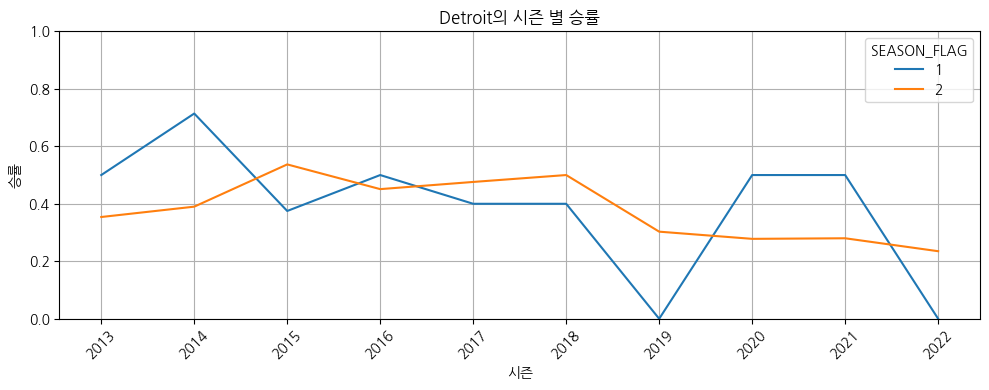

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(final_detroit_ranking.iloc[-20:], x='YEAR', y='W_PCT', hue='SEASON_FLAG')

plt.title('Detroit의 시즌 별 승률')
plt.xlabel('시즌')
plt.ylabel('승률')
plt.ylim((0, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 최근 5년 순위 그래프 그리기

## 시즌별 순위 파생 변수 생성

In [69]:
team = 'L.A. Lakers'

In [70]:
last_date = ranking.groupby('SEASON_ID').agg({'STANDINGSDATE': 'max'})
last_date_cond = ranking['STANDINGSDATE'].isin(last_date['STANDINGSDATE'])
final_ranking = ranking[last_date_cond].copy()
final_ranking['SEASON_RANK'] = final_ranking.groupby('SEASON_ID')['W_PCT'].rank(method='min', ascending=False)

final_ranking.sort_values(by=['STANDINGSDATE', 'SEASON_RANK'])

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,SEASON_RANK
92896,1610612742,0,22002,2003-10-04,West,Dallas,82,60,22,0.732,33-8,27-14,NaN,1.0
92897,1610612759,0,22002,2003-10-04,West,San Antonio,82,60,22,0.732,33-8,27-14,NaN,1.0
92898,1610612758,0,22002,2003-10-04,West,Sacramento,82,59,23,0.720,35-6,24-17,NaN,3.0
92899,1610612750,0,22002,2003-10-04,West,Minnesota,82,51,31,0.622,33-8,18-23,NaN,4.0
92900,1610612747,0,22002,2003-10-04,West,L.A. Lakers,82,50,32,0.610,31-10,19-22,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,1610612764,0,22022,2022-12-22,East,Washington,33,12,21,0.364,8-7,4-14,NaN,25.0
13,1610612759,0,22022,2022-12-22,West,San Antonio,31,10,21,0.323,5-12,5-9,NaN,27.0
14,1610612745,0,22022,2022-12-22,West,Houston,31,9,22,0.290,6-9,3-13,NaN,28.0
4288,1610612766,0,22022,2022-12-22,East,Charlotte,32,8,24,0.250,4-11,4-13,NaN,29.0


### 순위 그래프 그리기

In [71]:
# 파생 변수 생성
final_ranking['SEASON_FLAG'] = final_ranking['SEASON_ID'].apply(lambda id: id[0])
final_ranking['YEAR'] = final_ranking['SEASON_ID'].apply(lambda id: id[1:])

In [72]:
detroit_season_ranking = final_ranking[final_ranking['TEAM'] == team].sort_values('STANDINGSDATE')
detroit_season_ranking

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,SEASON_RANK,SEASON_FLAG,YEAR
92900,1610612747,0,22002,2003-10-04,West,L.A. Lakers,82,50,32,0.610,31-10,19-22,NaN,5.0,2,2002
92579,1610612747,0,12003,2003-10-27,West,L.A. Lakers,0,0,0,0.000,0-0,0-0,NaN,1.0,1,2003
87676,1610612747,0,22003,2004-10-11,West,L.A. Lakers,82,56,26,0.683,34-7,22-19,NaN,4.0,2,2003
87364,1610612747,0,12004,2004-11-01,West,L.A. Lakers,0,0,0,0.000,0-0,0-0,NaN,1.0,1,2004
82240,1610612747,0,22004,2005-10-09,West,L.A. Lakers,82,34,48,0.415,22-19,12-29,NaN,21.0,2,2004
81902,1610612747,0,12005,2005-10-31,West,L.A. Lakers,8,6,2,0.750,6-2,0-0,NaN,3.0,1,2005
76834,1610612747,0,22005,2006-10-04,West,L.A. Lakers,82,45,37,0.549,27-14,18-23,NaN,10.0,2,2005
76446,1610612747,0,12006,2006-10-30,West,L.A. Lakers,8,4,4,0.500,4-3,0-1,NaN,14.0,1,2006
71346,1610612747,0,22006,2007-10-05,West,L.A. Lakers,82,42,40,0.512,25-16,17-24,NaN,12.0,2,2006
70991,1610612747,0,12007,2007-10-29,West,L.A. Lakers,6,2,4,0.333,2-4,0-0,NaN,24.0,1,2007


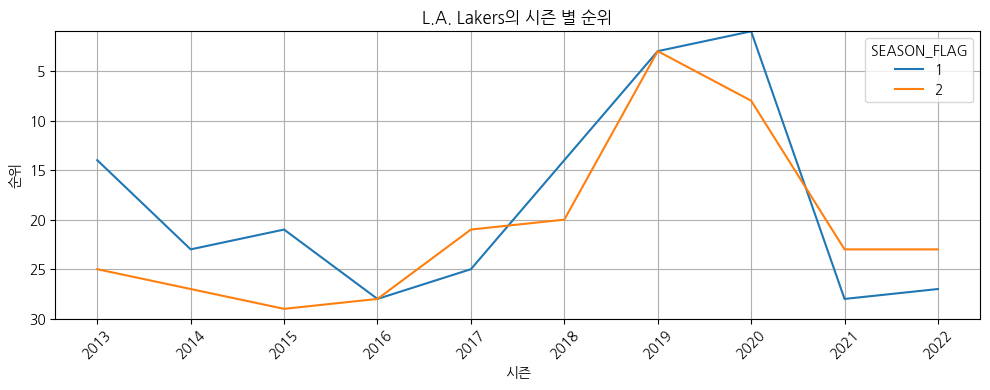

In [73]:
plt.figure(figsize=(10, 4))
sns.lineplot(detroit_season_ranking.iloc[-20:], x='YEAR', y='SEASON_RANK', hue='SEASON_FLAG')

plt.title(f'{team}의 시즌 별 순위')
plt.xlabel('시즌')
plt.ylabel('순위')
plt.ylim((30, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 전체 순위 변동

In [62]:
regular_final_ranking = final_ranking[final_ranking['SEASON_FLAG'] == '2'].sort_values('STANDINGSDATE')

regular_final_ranking

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,SEASON_RANK,SEASON_FLAG,YEAR
181506,1610612764,0,22002,2003-10-04,East,Washington,82,37,45,0.451,23-18,14-27,NaN,20.0,2,2002
181511,1610612739,0,22002,2003-10-04,East,Cleveland,82,17,65,0.207,14-27,3-38,NaN,28.0,2,2002
181510,1610612761,0,22002,2003-10-04,East,Toronto,82,24,58,0.293,15-26,9-32,NaN,27.0,2,2002
181509,1610612748,0,22002,2003-10-04,East,Miami,82,25,57,0.305,16-25,9-32,NaN,26.0,2,2002
181508,1610612741,0,22002,2003-10-04,East,Chicago,82,30,52,0.366,27-14,3-38,NaN,23.0,2,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,1610612753,0,22022,2022-12-22,East,Orlando,33,12,21,0.364,8-9,4-12,NaN,25.0,2,2022
4287,1610612764,0,22022,2022-12-22,East,Washington,33,12,21,0.364,8-7,4-14,NaN,25.0,2,2022
4289,1610612765,0,22022,2022-12-22,East,Detroit,34,8,26,0.235,4-12,4-14,NaN,30.0,2,2022
4275,1610612749,0,22022,2022-12-22,East,Milwaukee,31,22,9,0.710,14-3,8-6,NaN,1.0,2,2022


In [ ]:
regular_final_ranking = final_ranking[final_ranking['SEASON_FLAG'] == '2'].sort_values('STANDINGSDATE')

plt.figure(figsize=(10, 4))
sns.lineplot(regular_final_ranking, x='YEAR', y='SEASON_RANK', hue='TEAM')

plt.title('Detroit의 시즌 별 순위')
plt.xlabel('시즌')
plt.ylabel('순위')
plt.ylim((30, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
regular_final_ranking.to_csv(DATA_DIR / 'temp_ranking.csv', index=False)